In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.stats import norm
from tqdm import tqdm

In [2]:
def currency_converter(df):
    for i in df['Close'].columns.tolist():
        if i.endswith('.L'):
            GBXUSD = yf.download('GBPUSD=X', start=df.index[0], end=datetime.today(), interval='1d', progress=False)['Close']*0.01
            GBXUSD.index = GBXUSD.index.tz_localize('UTC')
            print(GBXUSD)
            df.loc[:, ('Close', i)] *= GBXUSD
            df.loc[:, ('Open', i)] *= GBXUSD
            df.loc[:, ('Adj Close', i)] *= GBXUSD
            df.loc[:, ('High', i)] *= GBXUSD
            df.loc[:, ('Low', i)] *= GBXUSD
        elif i.endswith('.SS') or i.endswith('.SZ'):
            CNYUSD = yf.download('CNYUSD=X', end=datetime.today(), interval='1d', progress=False)['Close']
            CNYUSD.index = CNYUSD.index.tz_localize('UTC')
            df.loc[:, ('Close', i)] *= CNYUSD
            df.loc[:, ('Open', i)] *= CNYUSD
            df.loc[:, ('Adj Close', i)] *= CNYUSD
            df.loc[:, ('High', i)] *= CNYUSD
            df.loc[:, ('Low', i)] *= CNYUSD
        elif i.endswith('.TO'):
            CADUSD = yf.download('CADUSD=X', end=datetime.today(), interval='1d', progress=False)['Close']
            CADUSD.index = CADUSD.index.tz_localize('UTC')
            df.loc[:, ('Close', i)] *= CADUSD
            df.loc[:, ('Open', i)] *= CADUSD
            df.loc[:, ('Adj Close', i)] *= CADUSD
            df.loc[:, ('High', i)] *= CADUSD
            df.loc[:, ('Low', i)] *= CADUSD
        elif i.endswith('.HK'):
            HKDUSD = yf.download('HKDUSD=X', end=datetime.today(), interval='1d', progress=False)['Close']
            HKDUSD.index = HKDUSD.index.tz_localize('UTC')
            df.loc[:, ('Close', i)] *= HKDUSD
            df.loc[:, ('Open', i)] *= HKDUSD
            df.loc[:, ('Adj Close', i)] *= HKDUSD
            df.loc[:, ('High', i)] *= HKDUSD
            df.loc[:, ('Low', i)] *= HKDUSD
        elif i.endswith('.AX'):
            AUDUSD = yf.download('AUDUSD=X', end=datetime.today(), interval='1d', progress=False)['Close']
            AUDUSD.index = AUDUSD.index.tz_localize('UTC')
            df.loc[:, ('Close', i)] *= AUDUSD
            df.loc[:, ('Open', i)] *= AUDUSD
            df.loc[:, ('Adj Close', i)] *= AUDUSD
            df.loc[:, ('High', i)] *= AUDUSD
            df.loc[:, ('Low', i)] *= AUDUSD
        elif i.endswith('.DE') or i.endswith('.PA'):
            EURUSD = yf.download('EURUSD=X', end=datetime.today(), interval='1d', progress=False)['Close']
            EURUSD.index = EURUSD.index.tz_localize('UTC')
            df.loc[:, ('Close', i)] *= EURUSD
            df.loc[:, ('Open', i)] *= EURUSD
            df.loc[:, ('Adj Close', i)] *= EURUSD
            df.loc[:, ('High', i)] *= EURUSD
            df.loc[:, ('Low', i)] *= EURUSD
        elif i.endswith('.BR'):
            BRLUSD = yf.download('BRLUSD=X', end=datetime.today(), interval='1d', progress=False)['Close']
            BRLUSD.index = BRLUSD.index.tz_localize('UTC')
            df.loc[:, ('Close', i)] *= BRLUSD
            df.loc[:, ('Open', i)] *= BRLUSD
            df.loc[:, ('Adj Close', i)] *= BRLUSD
            df.loc[:, ('High', i)] *= BRLUSD
            df.loc[:, ('Low', i)] *= BRLUSD
        elif i.endswith('.MX'):
            MXNUSD = yf.download('MXNUSD=X', end=datetime.today(), interval='1d', progress=False)['Close']
            MXNUSD.index = MXNUSD.index.tz_localize('UTC')
            df.loc[:, ('Close', i)] *= MXNUSD
            df.loc[:, ('Open', i)] *= MXNUSD
            df.loc[:, ('Adj Close', i)] *= MXNUSD
            df.loc[:, ('High', i)] *= MXNUSD
            df.loc[:, ('Low', i)] *= MXNUSD
        elif i.endswith('.SG'):
            SGDUSD = yf.download('SGDUSD=X', end=datetime.today(), interval='1d', progress=False)['Close']
            SGDUSD.index = SGDUSD.index.tz_localize('UTC')
            df.loc[:, ('Close', i)] *= SGDUSD
            df.loc[:, ('Open', i)] *= SGDUSD
            df.loc[:, ('Adj Close', i)] *= SGDUSD
            df.loc[:, ('High', i)] *= SGDUSD
            df.loc[:, ('Low', i)] *= SGDUSD
    
    return df

def download_data(tickers, start_date, end_date):
    """
    Downloads financial data for the given tickers and time range.
    """
    return yf.download(tickers, start=start_date, end=end_date, progress=False)

def calculate_value_change(data, positions):
    """
    Calculates the value change for each instrument based on closing and opening prices.
    """
    changes = data['Close'].sub(data['Open'])
    return changes.multiply(positions, axis='columns')

In [ ]:
# final_positions = pd.read_csv('final_position.csv', index_col=0).squeeze("columns")
# example
final_positions = {
    # "AAPL": 56,
    # "AMD": 20,
    # "AMZN": 35,
    # "BA": 25,
    # "BNZL": 100,
    # "DLR": 55,
    # "EWZ": 0,
    # "GOOG": 40,
    # "HYG": 540,
    # "LULU": 7,
    # "MC": 6,
    # "MCO": 28,
    # "META": 18,
    # "MSFT": 20,
    # "NVDA": 10,
    # "NVO": 55,
    # "SHY": 44,
    # "TLT": 56,
    # "UNH": 20,
    # "V": 44,
    # -----------------------------------------------------------------
    'ENB': 50,
    "PSA": 6,
    "TSM": 8,
    "NVDA": 10,
    "META": 13,
    "ABBV": 8,
    "AVGO": 20,
    'ABBV': 8,
    'V': 10,
    "RR.L": 670,
    # -----------------------------------------------------------------
    # "AMD": 20,
    # "SMCI":20,
}
final_positions = pd.Series(final_positions, name="Quantity")


# start_date, end_date = '2023-01-01', '2024-01-01'
# start_date, end_date = '2023-10-25', '2024-10-25'
def calculate_ratio(start_date, end_date):
    # print(type(final_positions))
    # print(final_positions)
    tickers = final_positions.index.unique().tolist()
    tickers = ['BNZL.L' if ticker == 'BNZL' else ticker for ticker in tickers]
    tickers = ['MC.PA' if ticker == 'MC' else ticker for ticker in tickers]
    final_positions.rename(index={'BNZL': 'BNZL.L'}, inplace=True)
    final_positions.rename(index={'MC': 'MC.PA'}, inplace=True)
    financial_data = download_data(tickers, start_date, end_date)
    financial_data = currency_converter(financial_data)
    value_change = calculate_value_change(financial_data, final_positions)

    # Optional: Save the value change DataFrame to CSV
    value_change.to_csv('value_change.csv', index=True)

    # Calculate and print the sum of rows
    row_sums = value_change.sum(axis=1)

    # %%
    def calculate_returns(data):
        """
        Calculates the daily returns for the given data.
        """
        return data.pct_change().dropna()

    def calculate_beta(asset_returns, market_returns):
        """
        Calculates the beta value of an asset or portfolio relative to the market.
        """
        covariance = asset_returns.cov(market_returns)
        # print(covariance)
        market_variance = market_returns.var()
        # print(market_variance)
        return covariance / market_variance

    def calculate_portfolio_value(financial_data, final_positions):
        """
        Calculates the daily total value of the portfolio.
        """
        # 计算每个资产每天的价值
        daily_values = financial_data['Close'] * final_positions
        # print(daily_values)
        daily_values = daily_values.dropna()
        # 计算投资组合的每日总价值
        total_value = daily_values.sum(axis=1)
        # print(total_value)
        return total_value

    # %%
    # Download S&P 500 Index data for the same time range
    market_data = download_data(['^GSPC'], start_date, end_date)
    market_returns = calculate_returns(market_data['Close'])

    # Calculate the portfolio's returns
    portfolio_returns = calculate_returns(value_change.sum(axis=1))
    portfolio_returns = portfolio_returns[1:]

    # 重新计算投资组合的每日总价值和收益率
    portfolio_total_value = calculate_portfolio_value(financial_data, final_positions)
    portfolio_returns = portfolio_total_value.pct_change().dropna()

    # %%
    # final_positions.to_csv('final_positions.csv', index=True)

    # %%
    # 计算累积收益
    cumulative_returns_portfolio = (1 + portfolio_returns).cumprod()
    cumulative_returns_market = (1 + market_returns).cumprod()

    # 转换为相对于第一天的百分比变化
    cumulative_returns_portfolio_percent = (cumulative_returns_portfolio - 1) * 100
    cumulative_returns_market_percent = (cumulative_returns_market - 1) * 100
    cumulative_returns_portfolio_percent.index = cumulative_returns_portfolio_percent.index.tz_localize(None)
    cumulative_returns_market_percent.index = cumulative_returns_market_percent.index.tz_localize(None)

    # 计算超额收益
    excess_returns = cumulative_returns_portfolio_percent-cumulative_returns_market_percent

    # plt.figure(figsize=(18, 6), dpi=150)
    # plt.plot(cumulative_returns_portfolio_percent.index, cumulative_returns_portfolio_percent, label='Strategic Total Returns', color='blue')
    # plt.plot(cumulative_returns_market_percent.index, cumulative_returns_market_percent, label='Benchmark (S&P500) Total Returns', alpha=0.7, color='red')
    # plt.plot(excess_returns.index, excess_returns, label='Excess Returns')
    # plt.title('Strategic Returns vs Benchmark Returns')
    # plt.xlabel('Date')
    # plt.ylabel('Total Returns (%)')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


    # %%
    portfolio_returns

    # %%
    market_returns.index = market_returns.index.tz_localize(None)
    portfolio_returns.index = portfolio_returns.index.tz_localize(None)
    # 计算贝塔值
    portfolio_beta = calculate_beta(portfolio_returns, market_returns)
    # print("Portfolio Beta:", portfolio_beta)


    # %%
    # 假设的年交易日数
    annual_trading_days = 252
    # 计算平均日收益率
    average_daily_return = portfolio_returns.mean()
    # 年化收益率
    annualized_return = (1 + average_daily_return) ** annual_trading_days - 1
    # 计算市场基准的平均日收益率
    average_daily_market_return = market_returns.mean()
    # 年化市场基准收益率
    annualized_market_return = (1 + average_daily_market_return) ** annual_trading_days - 1
    # 无风险利率
    risk_free_rate = 0.0505  # 根据您之前的描述
    # 计算阿尔法
    alpha = annualized_return - (risk_free_rate + portfolio_beta * (annualized_market_return - risk_free_rate))
    # print("投资策略的阿尔法: {:.4f}".format(alpha))

    # %%
    # 假设的年交易日数
    annual_trading_days = 252

    # 计算日收益率的标准差（波动率）
    portfolio_volatility = portfolio_returns.std()
    benchmark_volatility = market_returns.std()

    # 年化波动率
    annualized_portfolio_volatility = portfolio_volatility * (annual_trading_days ** 0.5)
    annualized_benchmark_volatility = benchmark_volatility * (annual_trading_days ** 0.5)

    # print("投资策略的年化波动率: {:.4%}".format(annualized_portfolio_volatility))
    # print("基准的年化波动率: {:.4%}".format(annualized_benchmark_volatility))

    # %%
    # plt.figure(figsize=(25, 5), dpi=150)
    # plt.plot(portfolio_returns.index, portfolio_returns, label='Strategic Returns')
    # plt.plot(market_returns.index, market_returns, label='Benchmark Returns', alpha=0.7)
    # plt.title('Strategic Returns vs Benchmark Returns')
    # plt.xlabel('Date')
    # plt.ylabel('Return')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # %%
    def sharpe_ratio_calculator(portfolio_returns, annual_trading_days=252, risk_free_rate=0.0505):
        # 计算日收益率的平均值
        average_daily_return = portfolio_returns.mean()
        # 计算日收益率的标准差
        daily_std_dev = portfolio_returns.std()
        # 年化收益率
        annualized_return = (1 + average_daily_return) ** annual_trading_days - 1
        # 年化标准差
        annualized_std_dev = daily_std_dev * (annual_trading_days ** 0.5)
        # 计算夏普比率
        sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev
        # print(sharpe_ratio)
        return sharpe_ratio
    sharpe_ratio = sharpe_ratio_calculator(portfolio_returns)
    # print("投资策略的夏普比率: {:.4f}".format(sharpe_ratio))
    
    def sortino_ratio_calculator(portfolio_returns, annual_return=0.06, risk_free_rate=0.0505):
        # 计算下行波动性
        # 首先计算投资组合日收益率低于平均值的收益率
        negative_returns = portfolio_returns[portfolio_returns < portfolio_returns.mean()]
        # 计算这些负收益率的标准差
        downside_std_dev = np.std(negative_returns)
        # 计算索提诺比率
        sortino_ratio = (annual_return - risk_free_rate) / downside_std_dev
        return sortino_ratio

    sortino_ratio = sortino_ratio_calculator(portfolio_returns, annual_return=0.07)
    # print("投资策略的索提诺比率: {:.4f}".format(sortino_ratio))

    # %%
    # 计算每日累积收益
    cumulative_returns = (1 + portfolio_returns).cumprod()

    # 计算每个时间点的累积最大收益
    cumulative_max = cumulative_returns.cummax()

    # 计算回撤
    drawdown = cumulative_max - cumulative_returns

    # 计算最大回撤
    max_drawdown = drawdown.max()

    # 找出最大回撤的时间范围
    end_date = drawdown.idxmax()  # 最大回撤结束的时间
    start_date = cumulative_returns[:end_date].idxmax()  # 最大回撤开始的时间

    # print("最大回撤: {:.2%}".format(max_drawdown))
    # print("最大回撤时间范围: {} 至 {}".format(start_date.date(), end_date.date()))

    # %%
    # 计算累积收益
    cumulative_returns_portfolio = (1 + portfolio_returns).cumprod()
    cumulative_returns_market = (1 + market_returns).cumprod()

    # 转化为百分比变化
    cumulative_returns_portfolio_percent = (cumulative_returns_portfolio - 1) * 100
    cumulative_returns_market_percent = (cumulative_returns_market - 1) * 100

    # 计算超额收益
    excess_returns = cumulative_returns_portfolio_percent - cumulative_returns_market_percent

    # 确保没有 NaN 和异常值
    excess_returns = excess_returns.replace([np.inf, -np.inf], np.nan).dropna()

    # 计算每日累积超额收益
    cumulative_excess_returns = (1 + excess_returns / 100).cumprod()

    # 计算每个时间点的累积最大收益
    cumulative_max = cumulative_excess_returns.cummax()

    # 计算回撤
    drawdown = cumulative_max - cumulative_excess_returns

    # 计算最大回撤
    max_drawdown = drawdown.max()

    # 找出最大回撤的时间范围
    end_date = drawdown.idxmax()
    start_date = cumulative_excess_returns[:end_date].idxmax()


    # print("超额收益最大回撤: {:.2%}".format(max_drawdown))
    # print("超额收益最大回撤时间范围: {} 至 {}".format(start_date.date(), end_date.date()))

    # %%
    # 计算超额收益的标准差
    excess_return_std_dev = excess_returns.std()

    # 计算信息比率
    information_ratio = excess_returns.mean() / excess_return_std_dev

    # print("信息比率: {:.4f}".format(information_ratio))


    # %%
    # 计算特雷诺比率的函数
    def calculate_treynor_ratio(returns, benchmark_returns, risk_free_rate=0.01):
        # alpha, beta = calculate_alpha_beta(returns, benchmark_returns, risk_free_rate)
        excess_returns = returns - risk_free_rate / 252
        return excess_returns.mean() / portfolio_beta

    treynor_ratio = calculate_treynor_ratio(portfolio_returns, market_returns)
    # print("特雷诺比率: {:.4f}".format(treynor_ratio))

    # %%
    # 计算年化收益率的函数
    def calculate_annualized_return(cumulative_returns):
        n_years = len(cumulative_returns) / 252
        return (cumulative_returns.iloc[-1] / cumulative_returns.iloc[0]) ** (1 / n_years) - 1

    annualized_return = calculate_annualized_return(cumulative_returns_portfolio)
    # print("年化收益率: {:.4%}".format(annualized_return))

    # %%
    # 绘制均线图
    # def plot_moving_averages(data, windows=[5, 10, 20, 60]):
    #     plt.figure(figsize=(14, 7), dpi=150)
    #     plt.plot(data.index, data, label='Portfolio Value')
    #     for window in windows:
    #         rolling_mean = data.rolling(window=window).mean()
    #         plt.plot(data.index, rolling_mean, label=f'{window}-Day Moving Average')
    #     plt.title('Portfolio Value and Moving Averages')
    #     plt.xlabel('Date')
    #     plt.ylabel('Value')
    #     plt.legend()
    #     plt.grid(True)
    #     plt.show()
    return annualized_return, annualized_portfolio_volatility, sharpe_ratio, sortino_ratio, information_ratio, treynor_ratio, alpha, portfolio_beta, portfolio_total_value


if __name__ == '__main__':
    # Start date and end date
    start_date = datetime(2024, 6, 1)
    end_date = datetime.today()

    # Create an empty DataFrame before the loop
    df = pd.DataFrame(columns=[
        'annualized_return', 'annualized_portfolio_volatility', 'sharpe_ratio',
        'sortino_ratio', 'information_ratio', 'treynor_ratio', 'alpha', 'portfolio_beta'
    ])
    df.index.name = 'Date'

    # Iterate through each date from start_date to end_date
    current_date = start_date
    with tqdm(total=(end_date - start_date).days) as pbar:
        while current_date <= end_date:
            # Calculate the date one year before the current date
            one_year_before = current_date - timedelta(days=365)
            # Get formatted dates for portfolio calculation
            portfolio_end_date = current_date.strftime('%Y-%m-%d')
            portfolio_start_date = one_year_before.strftime('%Y-%m-%d')
            # print(f"Portfolio Start Date: {portfolio_start_date}, Portfolio End Date: {portfolio_end_date}")

            # Calculate ratios (assuming this function returns the required values)
            annualized_return, annualized_portfolio_volatility, sharpe_ratio, sortino_ratio, information_ratio, treynor_ratio, alpha, portfolio_beta, portfolio_total_value = calculate_ratio(portfolio_start_date, portfolio_end_date)
            
            # Add the values as a new row to the DataFrame
            df.loc[portfolio_end_date] = [
                annualized_return, annualized_portfolio_volatility, sharpe_ratio,
                sortino_ratio, information_ratio, treynor_ratio, alpha, portfolio_beta
            ]

            # Move to the next day
            current_date += timedelta(days=1)
            pbar.update(1)

    # Output the final DataFrame
    print(df)

    df.to_csv('ratio-10.25.csv')


In [4]:
df

,annualized_return,annualized_portfolio_volatility,sharpe_ratio,sortino_ratio,information_ratio,treynor_ratio,alpha,portfolio_beta
Date,,,,,,,,
2024-06-01,0.564321,0.174351,2.997227,3.092074,1.118919,0.001430,0.286489,1.230340
2024-06-02,0.568280,0.174351,3.099367,3.076583,1.184640,0.001468,0.300172,1.228754
2024-06-03,0.568280,0.174351,3.099367,3.076583,1.184640,0.001468,0.300172,1.228754
2024-06-04,0.582966,0.174238,3.186720,3.076583,1.187735,0.001498,0.314642,1.228888
2024-06-05,0.582538,0.174259,3.175764,3.079752,1.221970,0.001494,0.314056,1.229174
...,...,...,...,...,...,...,...,...
2024-10-21,0.846218,0.193925,4.322767,2.410608,1.728908,0.001966,0.387333,1.265272
2024-10-22,0.834818,0.193626,4.268483,2.419203,1.728501,0.001945,0.381086,1.265644
2024-10-23,0.873298,0.193646,4.221262,2.424566,1.770711,0.001926,0.384966,1.268101


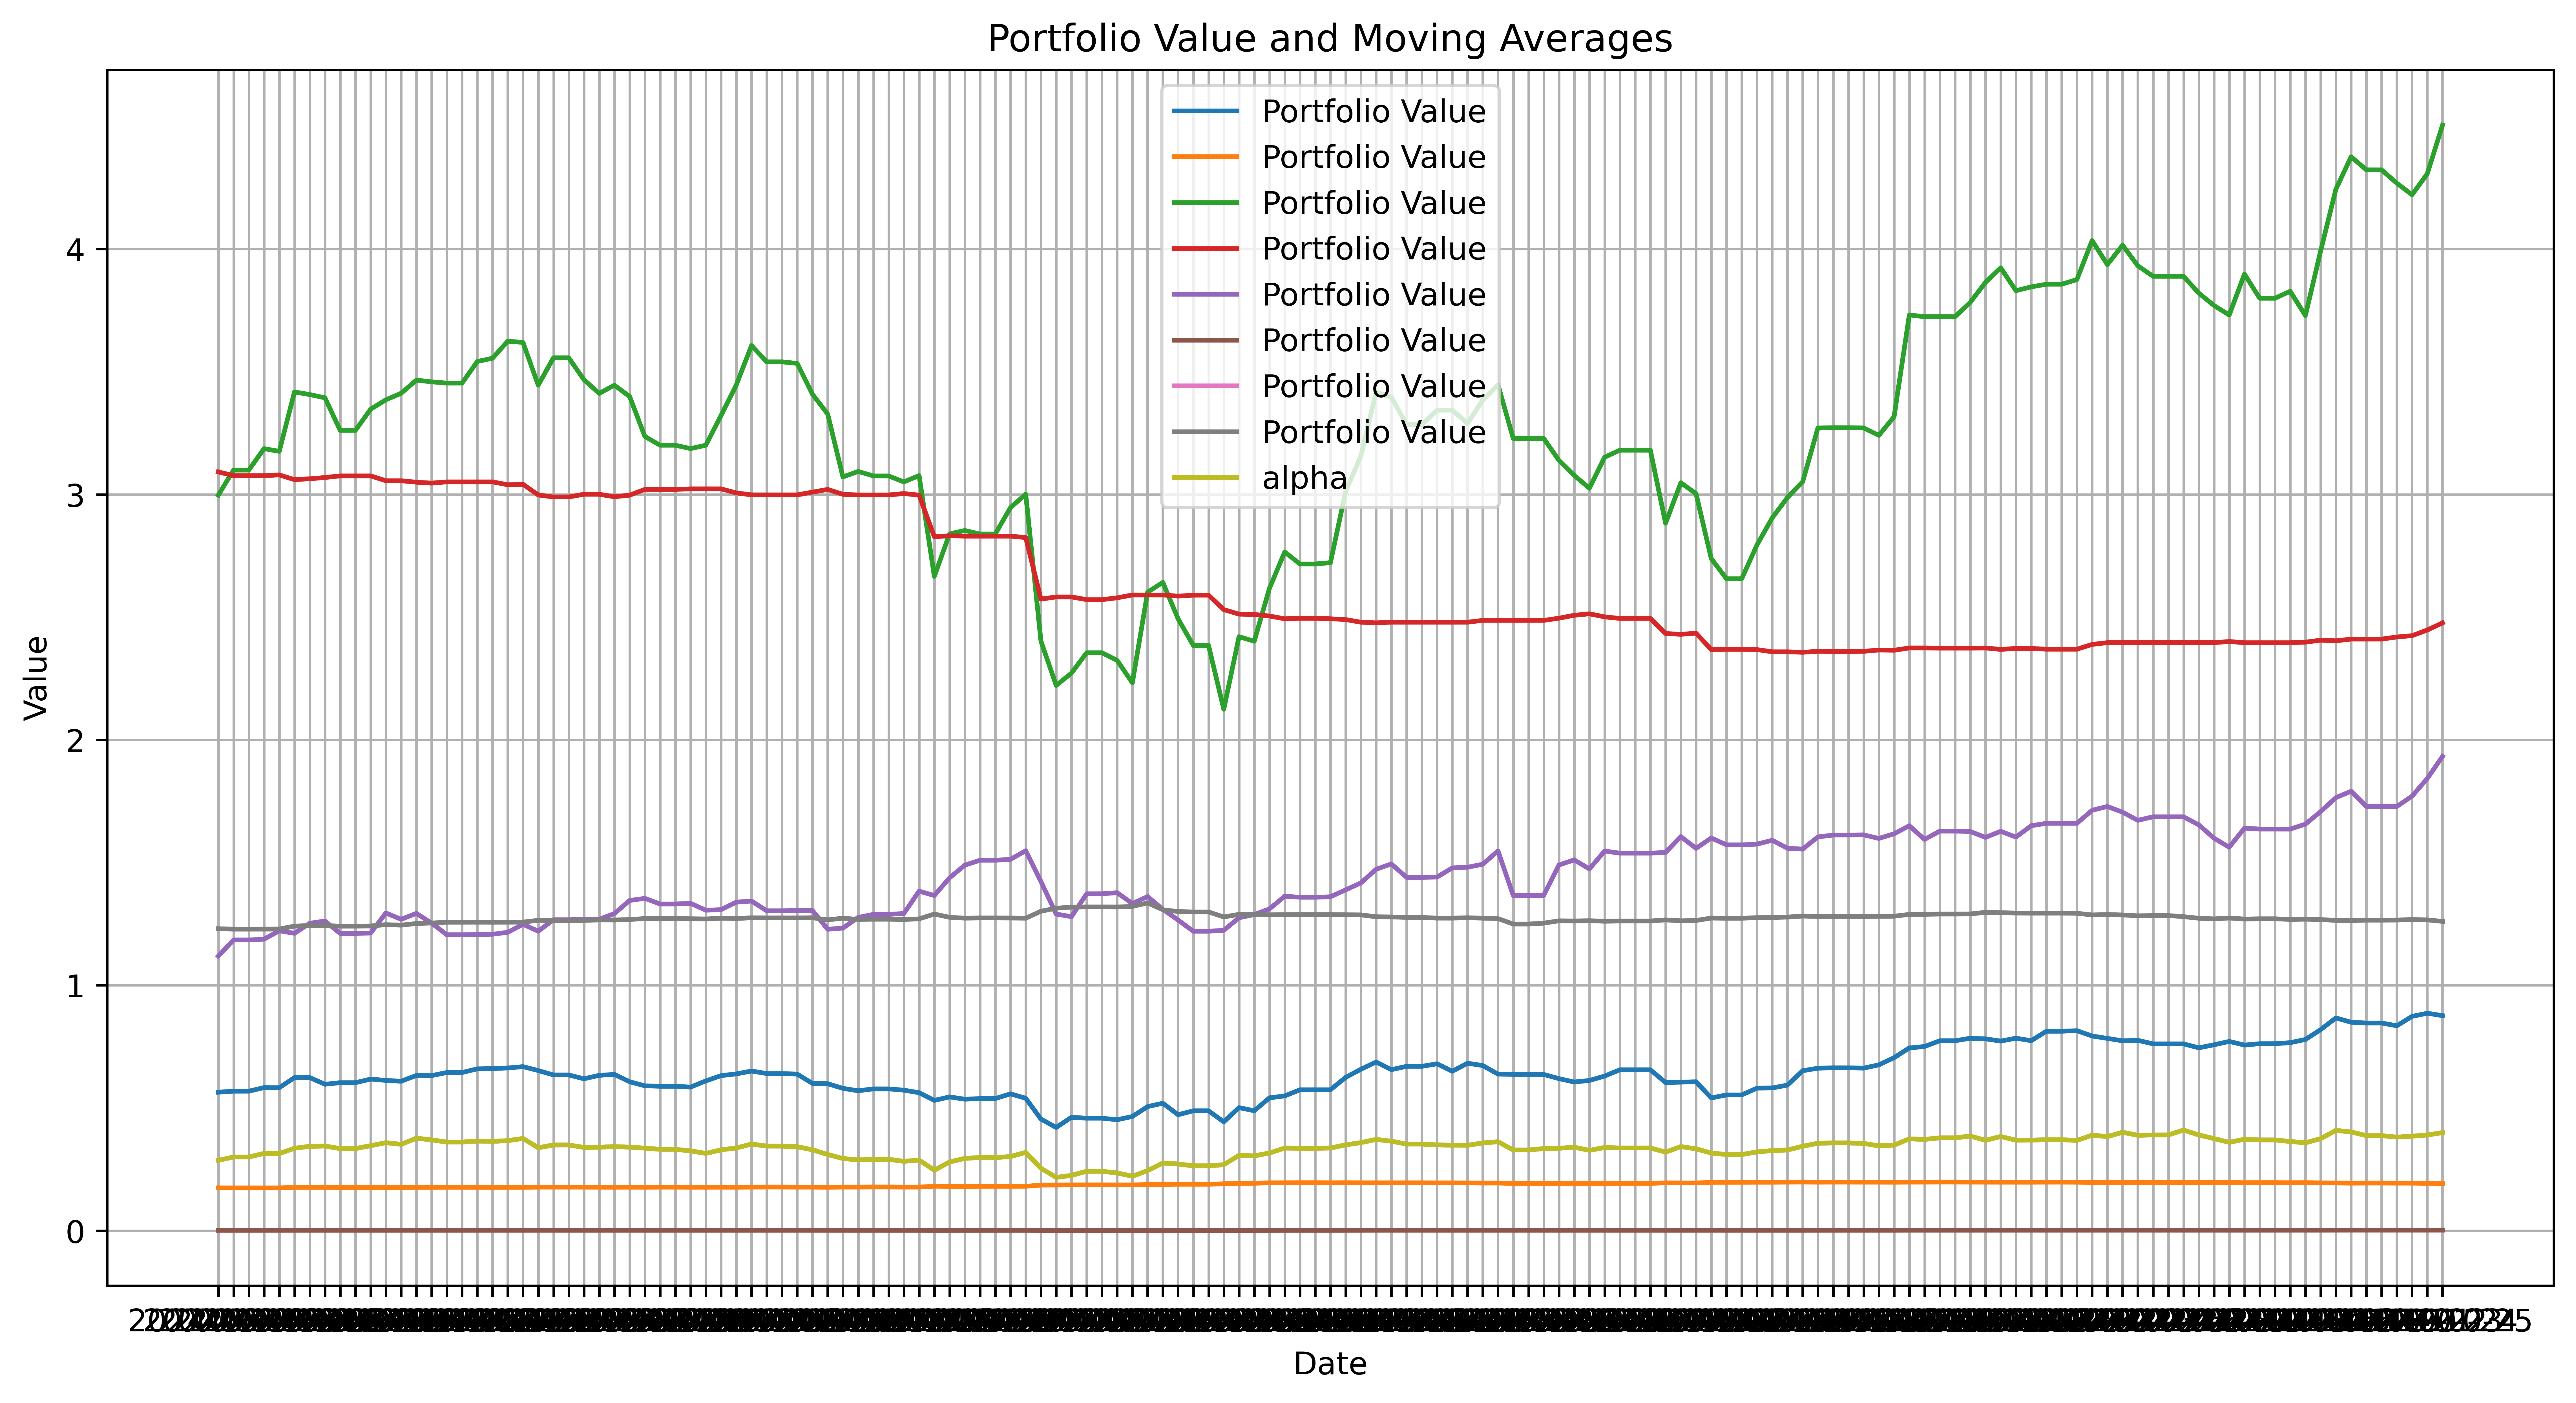

In [5]:
plt.figure(figsize=(14, 7), dpi=800)
plt.plot(df.index, df, label='Portfolio Value')
# for window in windows:
#     rolling_mean = data.rolling(window=window).mean()
plt.plot(df.index, df['alpha'], label=f'alpha')
plt.title('Portfolio Value and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

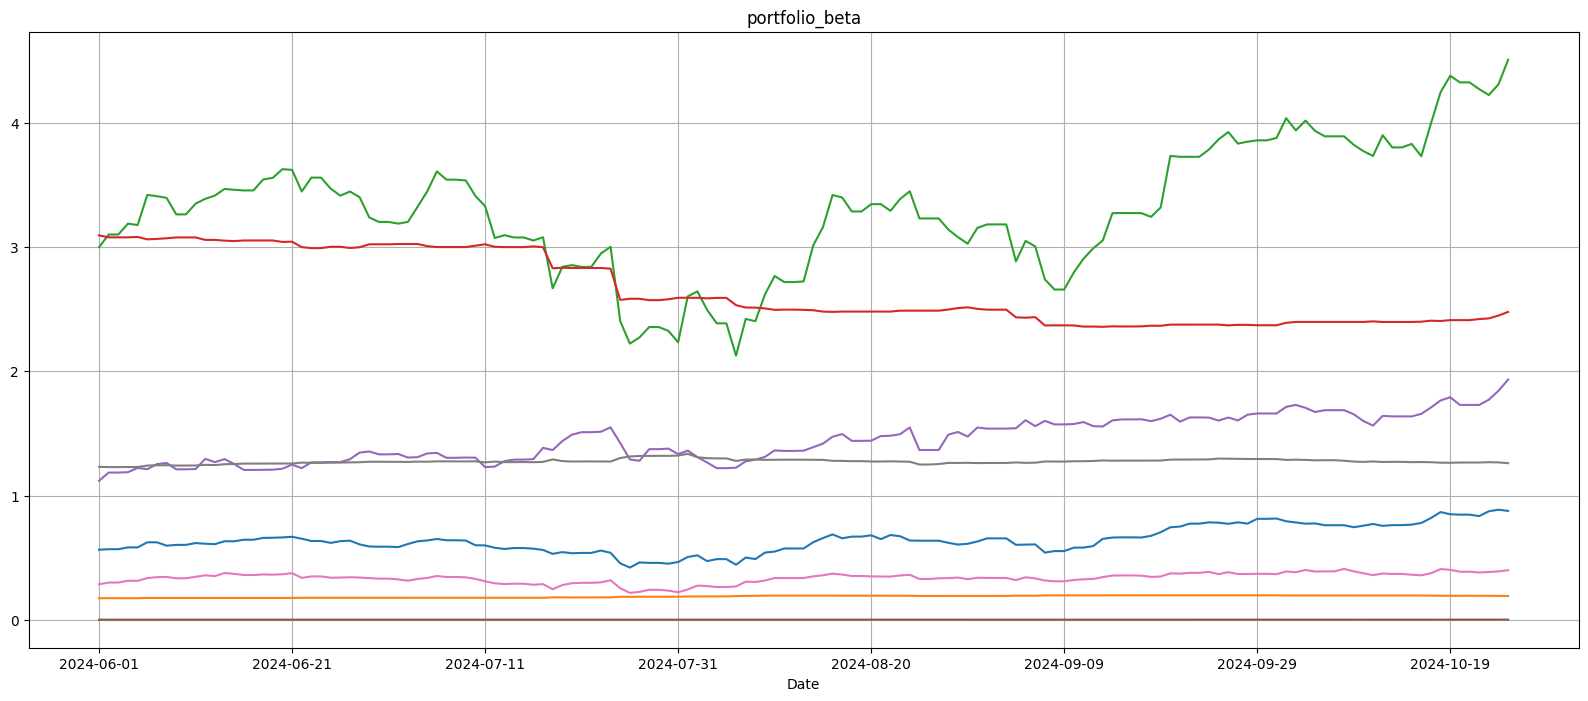

In [6]:
for i in df.columns.tolist():
    df[i].plot(figsize=(20, 8), title=i, grid=True)